<a href="https://colab.research.google.com/github/ovieimara/ITNPBD4/blob/master/churn_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install -Uqq nixtla

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from typing import Tuple, Any, List, Dict
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from nixtla.utils import in_colab
from nixtla import NixtlaClient

Dynamic Pricing and Personalization: Utilize churn insights to implement dynamic pricing strategies and personalized offers to encourage conversions and reduce churn


Why predict customer churn rate? Because you can prevent it.
It’s important to predict customer churn rate because you can do something about it. And depending on the nature of your business, it may be easier and cheaper to decrease your churn rate than acquire new customers.

Prediction leads to prevention. When you predict customer churn consistently and with a reasonable rate of accuracy, you can:

Run targeted retention strategies: Send email and SMS offers to customers you identify as high risk.
Save money on customer acquisition: When retention rates go up, you may be able to decrease spend on paid ads, for example.
Increase customer satisfaction: Send preemptive customer support messages or educational resources to customers you identify as high risk.
Proactively improve products: Start the long process of redesigning products before your churn rate becomes a mission-critical issue.
Gain a competitive advantage: Predict churn when it’s unlikely your competitors are doing so, and address issues they may be missing.


In [8]:
# Define time period
start_date = '2013-01-01'
n_periods = 150
frequency: str = 'days'

dates_index = pd.date_range(start=start_date, periods=n_periods, freq='MS')  # Monthly frequency

np.random.seed(42)
# Define parameters
baseline_churn = 200  # base churn rate
seasonal_amplitude = 2  # amplitude of seasonal fluctuation
trend_slope = 0.35  # monthly trend slope
noise_level = 0.7  # noise
max_churn = 300  # maximum churn rate

# Generate churn rates
churn_rates = []
for i, date in enumerate(dates_index):
    seasonal_component = seasonal_amplitude * np.sin(2 * np.pi * i / 12)  # Monthly seasonality
    trend_component = trend_slope * i
    noise = np.random.normal(0, noise_level)
    churn_rate = baseline_churn + seasonal_component + trend_component + noise
    churn_rates.append(np.clip(churn_rate, a_min=0, a_max=max_churn))  # clip churn rate between 0 and max_churn

# Create DataFrame
df = pd.DataFrame({'date': dates_index, 'churn_rate': churn_rates})
df.to_csv('churn_data.csv', index=False)


In [9]:
# visualize data

def plot_data(df: pd.DataFrame, title: str, x_label: str, y_label: str, grid: bool, fig: Tuple[int, int], conf_interval: np.ndarray, forecast_index, *args, **kwargs):
  plt.figure(figsize=fig)
  for arg in args:
    if isinstance(arg, str):
      plt.plot(df[arg], label=kwargs.get(arg)[0], color=kwargs.get(arg)[1])
    else:
      plt.plot(arg, kwargs.get("forecast")[2], label=kwargs.get("forecast")[0], color=kwargs.get("forecast")[1])

  if len(conf_interval):
    plt.fill_between(forecast_index, conf_interval[:, 0], conf_interval[:, 1], color='orange', alpha=0.3)

  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()
  plt.tight_layout()
  plt.grid(grid)
  plt.show()

In [10]:
  def decompose_time_series(df,  x_col, y_col: str, frequency='D') -> Any:
    # ensure the 'Time' column is in datetime format
    # df[x_col] = pd.to_datetime(df[x_col])

    # set 'Time' as the index
    # df.set_index(x_col, inplace=True)

    # decomposition
    decomposition = seasonal_decompose(df[y_col], model='additive', period=365 if frequency == 'days' else 12)
    return decomposition


  def plot_decomposition(decomposition):
    # Plot the decomposed components
    plt.figure(figsize=(12, 8))

    plt.subplot(411)
    plt.plot(decomposition.observed, label='Observed')
    plt.title('Observed')

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend', color='orange')
    plt.title('Trend')

    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal', color='green')
    plt.title('Seasonal')

    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuals', color='red')
    plt.title('Residuals')

    plt.tight_layout()
    plt.legend()
    plt.grid(True)
    plt.show()

In [11]:
def plot_fn(df: pd.DataFrame, y_col: str, plot_fn, title: str, x_label: str, y_label: str, lags: int=0):
  plt.figure(figsize=(12, 6))
  if lags:
    plot_fn(df[y_col], lags=lags)
  else:
    plot_fn(df[y_col])

  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.grid(True)
  plt.tight_layout()
  plt.show()

In [12]:
#read file
file_name = 'churn_data.csv'
churn_data_df = pd.read_csv(file_name)
# churn_data_df['date'] = pd.to_datetime(churn_data_df['date'])
# churn_data_df.set_index('date', inplace=True)


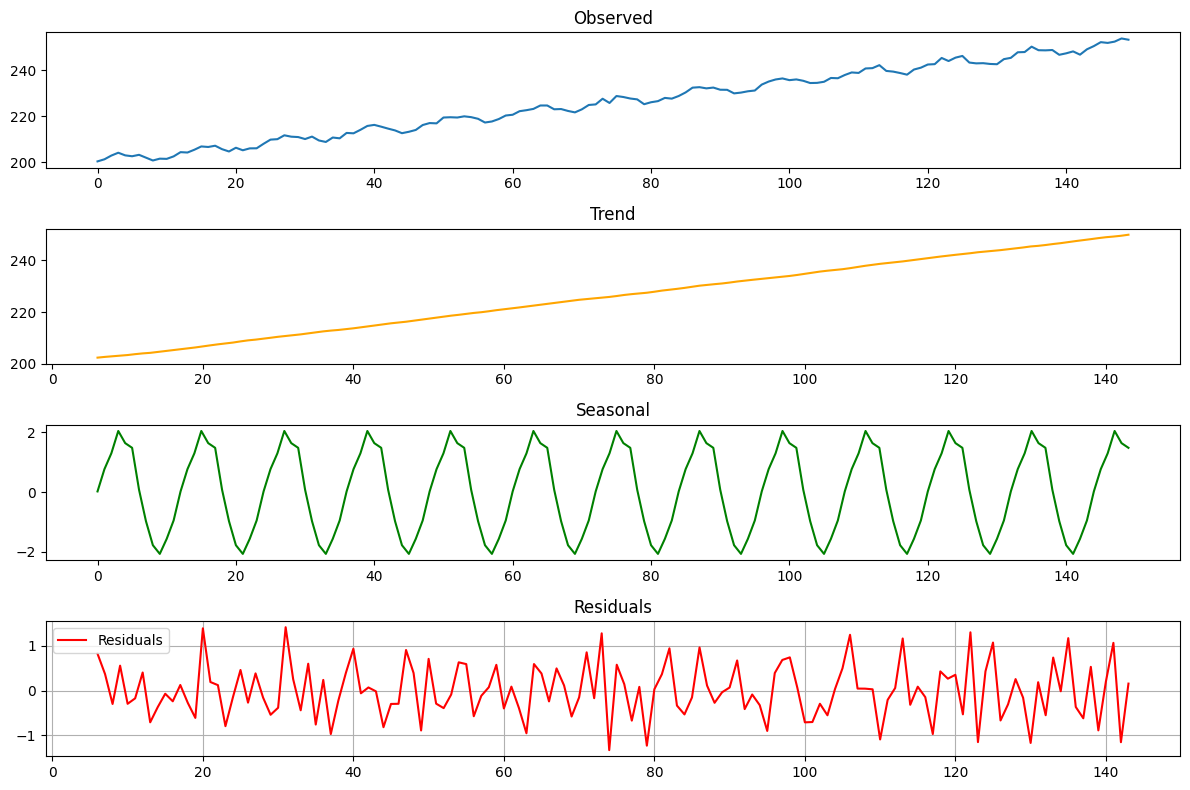

<Figure size 1200x600 with 0 Axes>

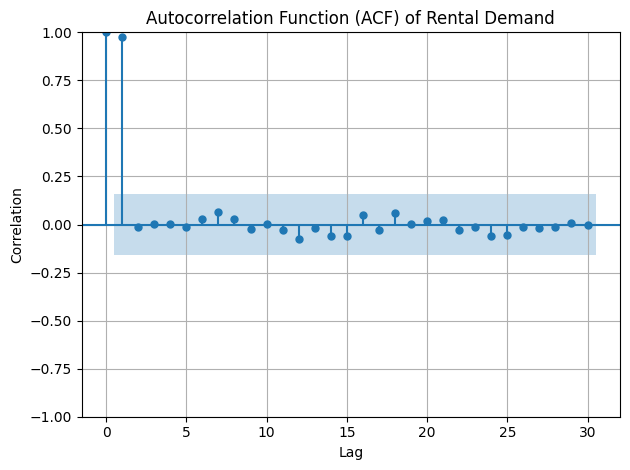

In [13]:
y_col = 'churn_rate'
frequency='months'
decomposition = seasonal_decompose(df[y_col], model='additive', period = 12)

# decomposition = decompose_time_series(churn_data_df, 'date', 'churn_rate', 'M')
plot_decomposition(decomposition)
title = "Autocorrelation Function (ACF) of Rental Demand"
x_label = "Lag"
y_label = "Correlation"

plot_fn(churn_data_df, 'churn_rate', plot_pacf, title, x_label, y_label, lags=30)


In [14]:
# kwargs = {
#      y_col: ('Historical Data', 'blue'),
#     'fuel_price': ('Fuel Price', 'red')
# }
# title = "Car Rental Demand and Fuel Price"
# x_label = "Date"
# y_label = "Car Rental Demand"
# grid = True
# fig = (12, 6)

# plot_data(churn_data_df, title, x_label, y_label, grid, fig, [], *kwargs.keys(), **kwargs)


In [15]:
nixtla_client = NixtlaClient(
    api_key = 'nixak-wFZ6sRKDf5eMQllDUKeth8N7m1J9IC2zJkAPaXbHvPmdz6oXDIQ19e6FXQZ3p2HK2H5f79vp1L4c19fH'
)
nixtla_client.validate_api_key()

True

In [16]:
churn_data_df.head()

,date,churn_rate
0,2013-01-01,200.347700
1,2013-02-01,201.253215
2,2013-03-01,202.885433
3,2013-04-01,204.116121
4,2013-05-01,202.968143


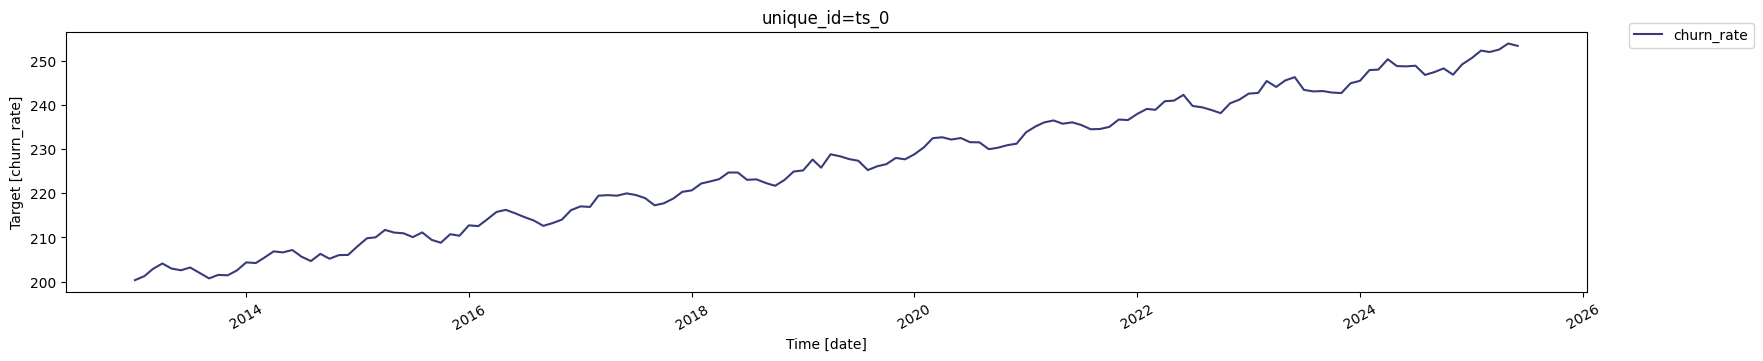

In [17]:
nixtla_client.plot(churn_data_df, time_col='date', target_col='churn_rate')

In [18]:
total_size = len(churn_data_df)
size = int(0.95 * total_size)
df = churn_data_df[:size]
m_periods = total_size - size
timegpt_fcst_df = nixtla_client.forecast(df=df, h=m_periods, freq='MS', time_col='date', target_col='churn_rate')
timegpt_fcst_df.head()

,date,TimeGPT
0,2024-11-01,248.23982
1,2024-12-01,249.33081
2,2025-01-01,249.93295
3,2025-02-01,250.95663
4,2025-03-01,251.77417


In [19]:
timegpt_fcst_df.info()
churn_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     8 non-null      datetime64[ns]
 1   TimeGPT  8 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 256.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        150 non-null    object 
 1   churn_rate  150 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


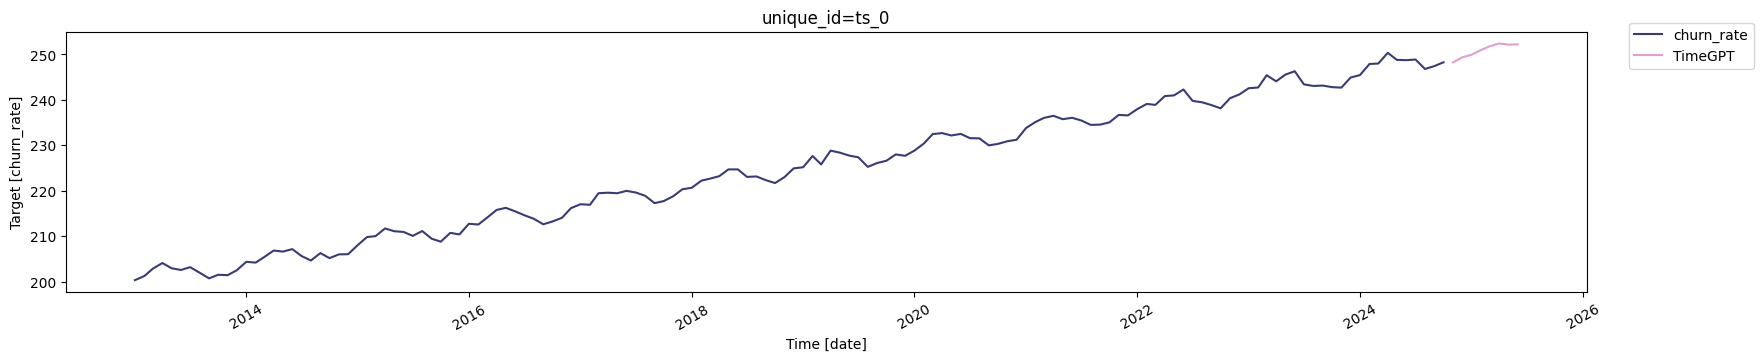

In [20]:
nixtla_client.plot(df, timegpt_fcst_df, time_col='date', target_col='churn_rate')

In [21]:
data_df = churn_data_df.copy()
data_df['date'] = pd.to_datetime(data_df['date'])
data_df.set_index('date', inplace=True)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

def calculate_metrics(y_true, y_pred):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = root_mean_squared_error(y_true, y_pred)

  return mae, mse, rmse

In [23]:
mae, mse, rmse = calculate_metrics(data_df['churn_rate'][size:], timegpt_fcst_df['TimeGPT'][: m_periods])

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 0.8471992740707961
Mean Squared Error: 1.0830474239883439
Root Mean Squared Error: 1.0406956442631745


In [24]:
total_size = len(churn_data_df)
size = int(0.90 * total_size)
df = churn_data_df[:size]
m_periods = total_size - size
timegpt_fcst_df = nixtla_client.forecast(df=df, h=m_periods, freq='MS', time_col='date', target_col='churn_rate')
# timegpt_fcst_df.head()

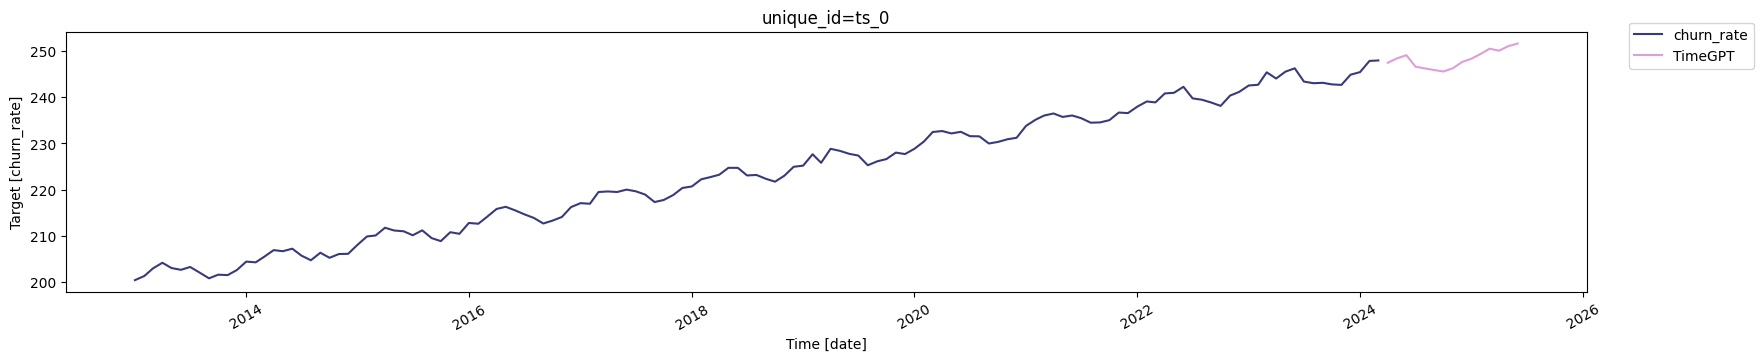

In [25]:
nixtla_client.plot(df, timegpt_fcst_df, time_col='date', target_col='churn_rate')

In [26]:
mae, mse, rmse = calculate_metrics(data_df['churn_rate'][size:], timegpt_fcst_df['TimeGPT'][: m_periods])

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 1.731540146938973
Mean Squared Error: 3.808355857201192
Root Mean Squared Error: 1.951500924212231


In [27]:
total_size = len(churn_data_df)
size = int(0.85 * total_size)
df = churn_data_df[:size]
m_periods = total_size - size
timegpt_fcst_df = nixtla_client.forecast(df=df, h=m_periods, freq='MS', time_col='date', target_col='churn_rate')


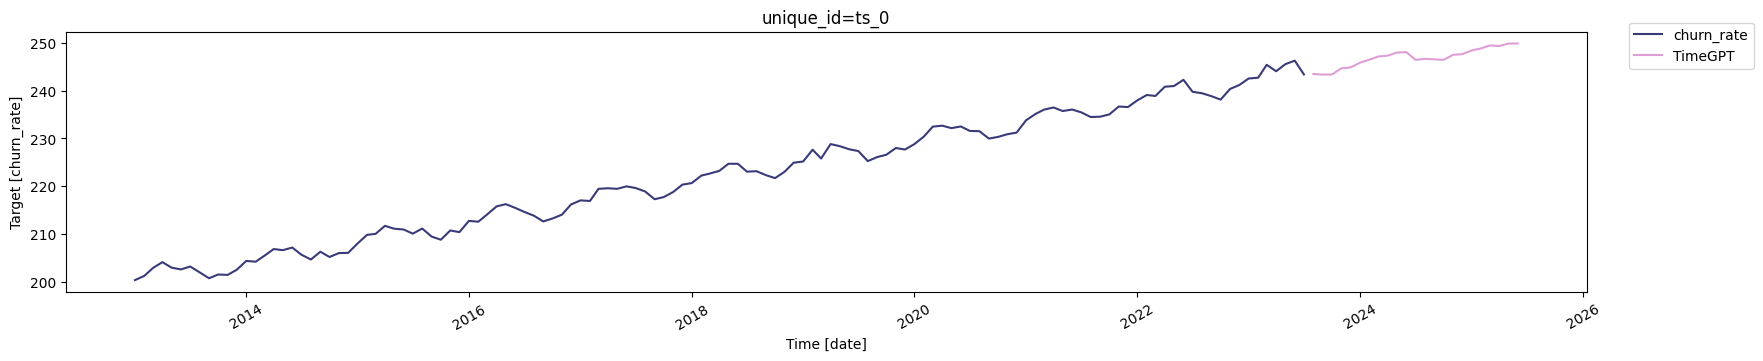

In [28]:
nixtla_client.plot(df, timegpt_fcst_df, time_col='date', target_col='churn_rate')

In [29]:
mae, mse, rmse = calculate_metrics(data_df['churn_rate'][size:], timegpt_fcst_df['TimeGPT'][: m_periods])

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 1.5914113426899346
Mean Squared Error: 3.9775129440422097
Root Mean Squared Error: 1.9943703126656818


In [30]:
total_size = len(churn_data_df)
size = int(0.80 * total_size)
df = churn_data_df[:size]
m_periods = total_size - size
timegpt_fcst_df = nixtla_client.forecast(df=df, h=m_periods, freq='MS', time_col='date', target_col='churn_rate')
timegpt_fcst_df.head()

,date,TimeGPT
0,2023-01-01,241.59354
1,2023-02-01,242.68466
2,2023-03-01,242.57236
3,2023-04-01,243.61667
4,2023-05-01,243.52530


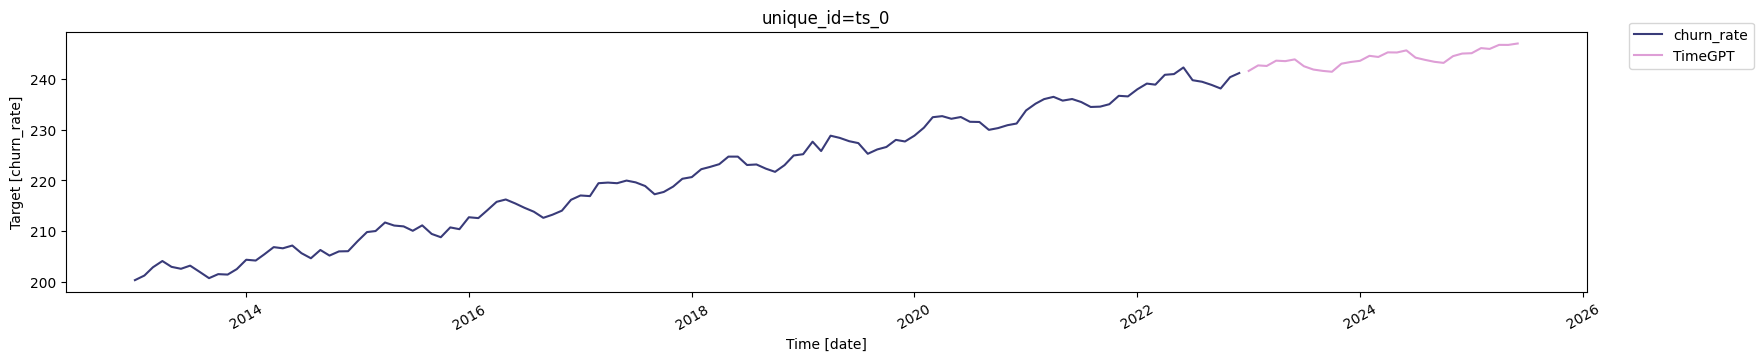

In [31]:
nixtla_client.plot(df, timegpt_fcst_df, time_col='date', target_col='churn_rate')

In [32]:
mae, mse, rmse = calculate_metrics(data_df['churn_rate'][size:], timegpt_fcst_df['TimeGPT'][: m_periods])

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 3.2141533869151546
Mean Squared Error: 14.321764547956041
Root Mean Squared Error: 3.7844107266463616
